In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().system('pip install scikit-plot')
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
data=pd.read_csv('predictive_maintenance.csv')
data.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
#counts the occurrences of each unique value in the 'Failure Type'
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
#handle the labels of rows in a DataFrame.
data.index

RangeIndex(start=0, stop=10000, step=1)

In [ ]:
#displays the count of missing values in each column
null_values = data.isnull().sum()
null_values

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
column_names = data.columns
column_names

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
#quick summary of your data table
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
#To counts occurrences of each unique value in the 'Failure Type'
failure_counts = data['Failure Type'].value_counts()
print(failure_counts)

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


In [ ]:
#used to change the values in the 'Target' column of your DataFrame
data['Target'] = data['Target'].replace({0: 'non failure', 1: 'failure'})


In [ ]:
print(data)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]       Target  \


In [ ]:
x=data[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]']]
y=data['Failure Type']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# to split your dataset into two separate parts
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# create and train a logistic regression model.
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.972


In [ ]:
new_data=[[298.9,309,1410,65.7,191]]
predictions = model.predict(new_data)
predictions


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [ ]:

new_data=[[298.1,308.6,1551,42.8,0]]
predictions=model.predict(new_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
#create and train a Random Forest classifier model using the scikit-learn library.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

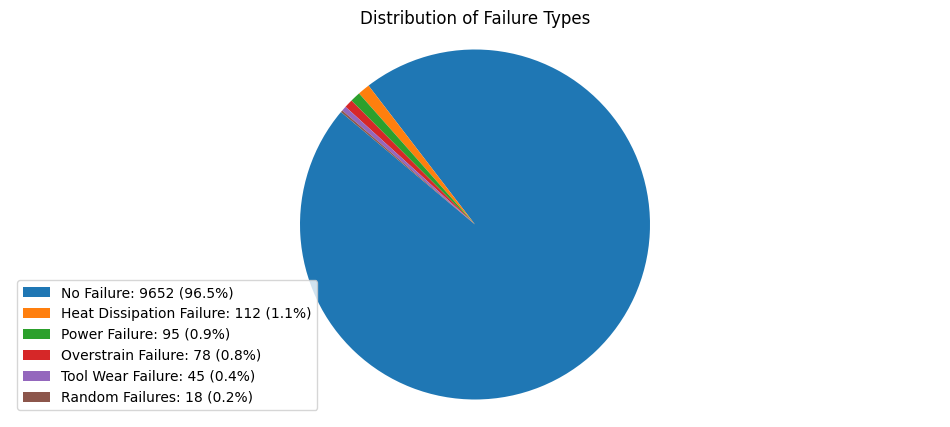

In [ ]:
# Assuming 'failure_type' is the column representing different types of failure
failure_counts = data['Failure Type'].value_counts()

# Plot the pie chart
plt.figure(figsize=(12, 5))
patches, _ = plt.pie(failure_counts, startangle=140)
plt.title('Distribution of Failure Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a legend with color patches and percentages
legend_labels = [f"{label}: {count} ({percentage:.1f}%)" for label, count, percentage in zip(failure_counts.index, failure_counts, (failure_counts / failure_counts.sum()) * 100)]
plt.legend(handles=patches, labels=legend_labels, loc='lower left')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_test, prediction):
    cm_ = confusion_matrix(y_test, prediction)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_, cmap='coolwarm', linecolor='white', linewidths=1, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Assuming 'failure_type' is the column representing different types of failure
failure_counts = data['Failure Type'].value_counts()



In [ ]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)


Index(['Product ID', 'Type', 'Target', 'Failure Type'], dtype='object')


In [ ]:
cleaned_data = data.drop(columns=non_numeric_columns)  # Or use dropna() to drop rows with non-numeric values


In [ ]:
correlation_matrix = cleaned_data.corr()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

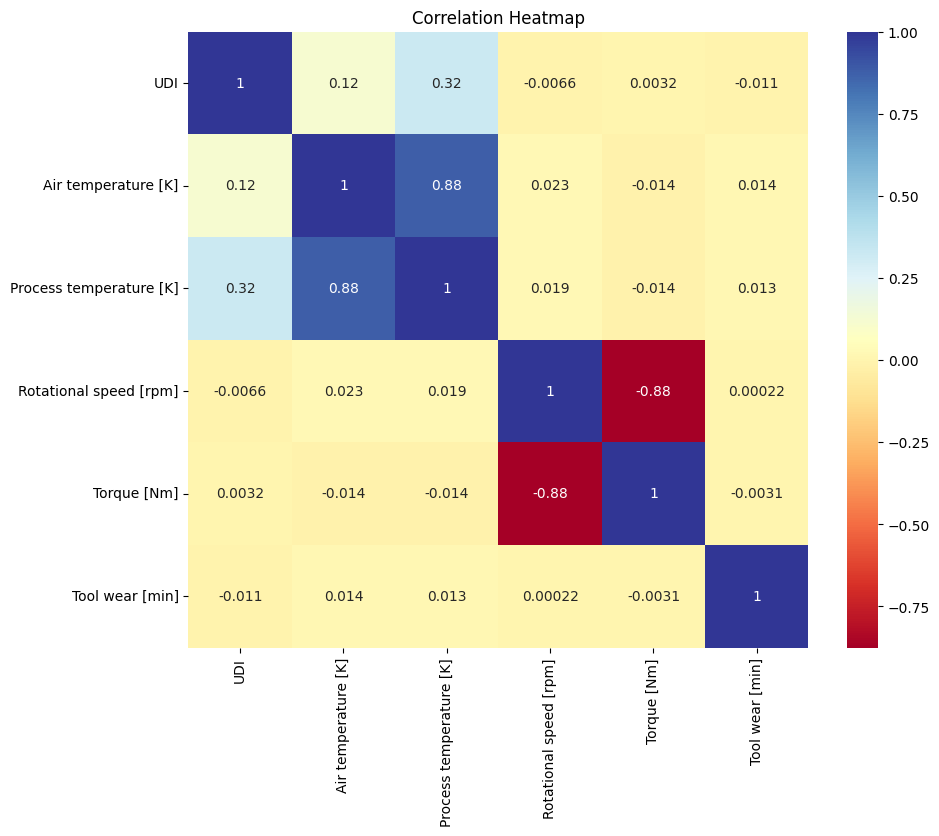

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [ ]:
def trainer(model, x_train, y_train, x_test, y_test):
    # Fit your model
    model.fit(x_train, y_train)
    # Predict on the fitted model
    prediction = model.predict(x_test)
    # Print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_test)))
    print(classification_report(y_test, prediction))
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, prediction)
    print('\nConfusion Matrix:\n', cm)

In [ ]:

# Create RandomForestClassifier model
rf_model = RandomForestClassifier()

# Call the function with RandomForestClassifier model
trainer(rf_model, x_train, y_train, x_test, y_test)


For RandomForestClassifier, Accuracy score is 0.9815 

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.92      0.80      0.86        15
              No Failure       0.99      1.00      0.99      1935
      Overstrain Failure       0.70      0.54      0.61        13
           Power Failure       0.75      0.75      0.75        20
         Random Failures       0.00      0.00      0.00         6
       Tool Wear Failure       0.00      0.00      0.00        11

                accuracy                           0.98      2000
               macro avg       0.56      0.51      0.53      2000
            weighted avg       0.97      0.98      0.98      2000


Confusion Matrix:
 [[  12    3    0    0    0    0]
 [   1 1929    1    4    0    0]
 [   0    5    7    1    0    0]
 [   0    5    0   15    0    0]
 [   0    6    0    0    0    0]
 [   0    9    2    0    0    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.982


In [ ]:
new_data=[[298.9,309,1410,65.7,191]]
predictions = model.predict(new_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['Power Failure'], dtype=object)

In [ ]:
new_data=[[298.1,308.6,1551,42.8,0]]
predictions=model.predict(new_data)
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['No Failure'], dtype=object)

In [ ]:
def predict_failure(model, new_data):
    prediction = model.predict(new_data)
    if prediction == 1:
        return "Failure"
    else:
        return "Non-Failure"

# Example usage:
import pandas as pd

new_data_1 = pd.DataFrame([[298.9, 309, 1410, 65.7, 191]], columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])
new_data_2 = pd.DataFrame([[298.1, 308.6, 1551, 42.8, 0]], columns=['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'])

print("Prediction for new_data_1:", predict_failure(model, new_data_1))
print("Prediction for new_data_2:", predict_failure(model, new_data_2))


Prediction for new_data_1: Non-Failure
Prediction for new_data_2: Non-Failure
